In [1]:
# Importing the libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
import heapq
import math
import sys

In [2]:
# Ask the User for Start Node 
start=tuple(map(int,input("Enter the start Coordinates (x y)").split()))
# Ask the User for Goal Node
goal=tuple(map(int,input("Enter the goal Coordinates (x y)").split()))
# The max x and y coordinate of the grid
max_x=300
max_y=200
#Radius of the robot
radius=4
#Clearance taken
clearance=2
#Checks if the goal node is within the C Space
assert(goal<=(max_x,max_y))

Enter the start Coordinates (x y)5 5
Enter the goal Coordinates (x y)295 195


In [3]:
def compute_cost(graph):
    '''
    Computes the cost it takes to travel from one node to its neighbour
    
    Arguments:
    graph-- Dictionary of nodes along with their neighbours
    
    Return:
    cost-- Dictionary of cost for every node and corresponding neighbours
    '''
    
    cost={}
    for parent,nbr in graph.items():
        cost[parent]={}
        for pt in nbr:
            # Cost is taken as the euclidien distance between two nodes
            cost[parent][pt]=np.round(math.sqrt((parent[0]-pt[0])**2+(parent[1]-pt[1])**2),3)
    
    return cost

In [4]:
def manhattan_distance(pt1,pt2):
    '''
    Calculates the manhattan distance between two points for 'optimistic cost to go' in A* Search
    
    Arguments:
    pt1,pt2-- tuple of two points
    
    Return:
    distance-- Manhattan distance between two points
    '''
    
    x1=pt1[0]
    y1=pt1[1]
    x2=pt2[0]
    y2=pt2[1]
    #Manhattan distance is calculated as the sum of absolute difference between the x and y coordinates
    distance=abs(x1-x2)+abs(y1-y2)
    
    return distance

In [5]:
def base_graph_generate(point,max_x,max_y):
    '''
    Calculate neighbours of a given point
    
    Arguments:
    point-- tuple containing the x and y coordinate
    max_x-- maximum x coordinate of the grid
    max_y-- maximum y coordinate of the grid
    
    Return:
    graph-- Dictionary containing neighbours of a given point
    '''
    # x and y coordinate are extracted from the tuple
    x=point[0]
    y=point[1]
    graph={}
    
    # For origin (0,0)
    if x==0 and y==0:
        graph[point]={(x+1,y),(x,y+1),(x+1,y+1)}
    # For last coordinate in the grid
    elif x==max_x and y==max_y:
        graph[point]={(x-1,y),(x-1,y-1),(x,y-1)}
    # For points in the x=0 and 0< y <max_y 
    elif x==0 and y!=0 and y!=max_y:
        graph[point]={(x+1,y),(x,y-1),(x,y+1)}
    # For points in the y=0 and 0< x <max_x
    elif y==0 and x!=0 and x!=max_x:
        graph[point]={(x-1,y),(x+1,y),(x,y+1)}
    # For point (0,max_y)
    elif x==0 and y==max_y:
        graph[point]={(x,y-1),(x+1,y),(x+1,y-1)}
    # For point (max_x,0)
    elif y==0 and x==max_x:
        graph[point]={(x-1,y),(x,y+1),(x-1,y+1)}
    # For points in the y=max_y and 0< x <max_x
    elif y==max_y and x!=0 and x!=max_x:
        graph[point]={(x,y-1),(x+1,y),(x-1,y)}
    # For points in the x=max_x and 0< y <max_y 
    elif x==max_x and y!=0 and y!=max_y:
        graph[point]={(x-1,y),(x,y+1),(x,y-1)}
    # For rest of the case
    else:
        graph[point]={(x+1,y),(x-1,y),(x,y+1),(x,y-1),(x+1,y+1),(x-1,y+1),(x-1,y-1),(x+1,y-1)}
    
    return graph

In [6]:
def astar_algorithm(graph,start,goal):
    '''
    Executes the A*_Seach Algorithm
    
    Arguments:
    graph-- Dictionary containing cost it takes to travel the Free C Space
    start-- Tuple containing the start coordinates
    goal-- Tuple containing the goal coordinates
    
    Returns:
    CLOSED-- all the nodes searched by the algorithm
    backtrack-- used to compute the shortest path 
    '''
    OPEN=[]
    CLOSED=[]
    past_cost={}
    backtrack={}
    # Past Cost of start node is set as zero and for rest of the nodes infinity
    for node in graph.keys():
        if node==start:
            past_cost[node]=0
        else:
            past_cost[node]=math.inf
    # Start node along with the cost is appended into OPEN
    OPEN.append((0,start))
    # Loop runs till the length of OPEN is not equal to zero
    while len(OPEN)>0:
        # node with the lowest cost is removed from OPEN
        current_cost,current_node=heapq.heappop(OPEN)
        # removed node is then added to CLOSED 
        CLOSED.append(current_node)
        # if the goal node is reached the search is terminated
        if current_node==goal:
            print('SUCCESS: GOAL REACHED')
            return backtrack,CLOSED
        # If the goal node is not reached then the neighbours of the current node are searched
        for nbr,_ in graph[current_node].items():
            # if the neighbour node is not already searched
            if nbr not in CLOSED: 
                # tentative cost is calculated
                tentative_cost=past_cost[current_node]+graph[current_node][nbr]+manhattan_distance(current_node,nbr)
                # if the tentative cost is less than the cost it takes to reach neighbour node
                if tentative_cost<past_cost[nbr]:
                    backtrack[nbr]={}
                    # past cost of neighbour is updated
                    past_cost[nbr]=tentative_cost
                    backtrack[nbr][tentative_cost]=current_node
                    # neighbour node along with cost is added to the list OPEN
                    heapq.heappush(OPEN,(tentative_cost,nbr))
                    # If the goal node is reached the search is terminated
                    if nbr== goal:
                        print('SUCCESS: GOAL REACHED')
                        CLOSED.append(nbr)
                        return backtrack,CLOSED
    
    print("GOAL NOT REACHED")

In [7]:
def backtracking_func(backtrack,goal,start):
    '''
    Computes the shortest path for a given problem
    
    Arguments:
    backtrack-- dictionary from A*search containing nodes and neighours travelled
    goal-- tuple containing the goal coordinates
    start-- tuple containing the start coordinates
    
    Return:
    backtrack_nodes-- list of nodes travelled in the shortest path
    '''
    backtrack_nodes=[]
    # goal node is added to the list
    backtrack_nodes.append(goal)
    while goal!=0:
        
        for nbr,val in reversed(list(backtrack.items())):
            
            for ct,node in val.items():
                
                if nbr==goal:
                    
                    if node not in backtrack_nodes:
                        backtrack_nodes.append(node)
                    
                    goal=node
                    
                    if node==start:
                        goal=0
                        break
    return backtrack_nodes

In [8]:
def astar_pointR(start,goal):
    
    print("Creating The C Space")
    # List for all points in the grid
    all_points=[]
    # Runs the loop through the entire grid 
    for x in range(max_x+1): # Loop runs from 0 to 300
        for y in range(max_y+1): # Loop runs from 0 to 200
            all_points.append((x,y))
    print("Successfully Created The C Space")
    
    print("Creating the Free C Space")
    # List for obstacle points in the grid
    obstacle_points=[]
    # list of points taking obstacles, radius of robot and clearance in consideration
    map_points=[]
    for pt in all_points:
        x=pt[0]
        y=pt[1]
        
        clr=radius+clearance
        # Triangular Shaped Obstacle with (20,150), (45,175) and (30,80) as its vertex
        if(130+math.sqrt(2)*clr+x>=y) and (290-math.sqrt(50)*clr-7*x<=y) and ((17/3)*x-90-math.sqrt(298/9)*clr<=y):
            map_points.append((x,y))
           
        if(130+x>=y) and (290-7*x<=y) and ((17/3)*x-90<=y):
            obstacle_points.append((x,y))
            
        # Complex shaped Obstacle
        if (x>=90 and 5*x-360<=y and y<=155) or (x>=90 and(x+530>=4*y) and ((5/6)*x+(170/3)<=y) and x<=130):
            obstacle_points.append((x,y))
        
        if (x>=90-clr and 5*x-360-math.sqrt(26)*clr<=y and y<=155+clr) or (x>=90-clr and(x+530+math.sqrt(17)*clr>=4*y) and ((5/6)*x+(170/3-math.sqrt(61/36)*clr)<=y) and x<=130+clr):
            map_points.append((x,y))
            
        # Complex shaped Obstacle
        if x>=120 and x<=160 and y>=35 and y<=130:
            if (x-10)>=y:
                if x-400<=-2*y:
                    if 3*x-360<=y:
                        if x-60<=y or (-7/3)*x+(1120/3)>=y:
                            if (-2/5)*x +93<=y:
                                obstacle_points.append((x,y))

        
        if x>=120-clr and x<=160+clr and y>=35-clr and y<=130+clr:
            if (x-10+math.sqrt(2)*clr)>=y:
                if x-400-math.sqrt(5)*clr<=-2*y:
                    if 3*x-360-math.sqrt(10)*clr<=y:
                        if x-60-math.sqrt(2)*clr<=y or (-7/3)*x+(1120/3+math.sqrt(58/9)*clr)>=y:
                            if (-2/5)*x +93-math.sqrt(29/25)*clr<=y:
                                map_points.append((x,y))
                                
        # Triangular Shaped Obstacle
        if (2*x-340>=y) and ((-5/2)*x+605>=y) and (x-350>=-4*y):
            obstacle_points.append((x,y))
        
        if (2*x-340+math.sqrt(5)*clr>=y) and ((-5/2)*x+605+math.sqrt(29/4)*clr>=y) and (x-350+math.sqrt(17)*clr>=-4*y):
            map_points.append((x,y))
            
        # Trapezoidal Shaped Obstacle
        if (-3*x+960>=y) and ((2/11)*x+(1460/11)>=y) and ((7/2)*x-(565)>=y) and (x+580<=5*y):
            obstacle_points.append((x,y))
        
        if (-3*x+960+math.sqrt(10)*clr>=y) and ((2/11)*x+(1460/11+math.sqrt(125/121)*clr)>=y) and ((7/2)*x-(565-math.sqrt(53/4)*clr)>=y) and (x+580-math.sqrt(26)*clr<=5*y):
            map_points.append((x,y))
    
    # Checks if the goal node is in the obstacle
    if goal in map_points:
        print("Goal Cant be Reached")
        sys.exit()
    
    # C space is generated
    base_graph={}
    for pt in all_points:
        base_graph[pt]=base_graph_generate(pt,max_x,max_y)[pt]
    
    # All the obstacle nodes are removed to create Free C space
    for parent,neighbours in base_graph.items():
        neighbours_copy = neighbours.copy()
        for coordinates in neighbours_copy:
            if coordinates in map_points:
                neighbours.remove(coordinates)
    
    base_graph_copy = base_graph.copy()
    for parent,_ in base_graph_copy:
        if parent in map_points:
            del base_graph[parent]
    print("Successfully Created The Free C Space")
    
    print("Calculating Cost")
    # Costs are calculated 
    cost_nodes=compute_cost(base_graph)
    print("Cost Calculated")
    
    print("Computing A* Algorithm")
    backtrack,visited=astar_algorithm(cost_nodes,start,goal)
    
    return backtrack,visited,obstacle_points,map_points

In [9]:
backtrack,visited,obstacle_points,map_points=astar_pointR(start,goal)

Creating The C Space
Successfully Created The C Space
Creating the Free C Space
Successfully Created The Free C Space
Calculating Cost
Cost Calculated
Computing A* Algorithm
SUCCESS: GOAL REACHED


In [10]:
backtrack_node=backtracking_func(backtrack,goal,start)

In [11]:
print(backtrack_node)

[(295, 195), (294, 194), (293, 193), (292, 192), (291, 191), (290, 190), (289, 189), (288, 188), (287, 187), (286, 186), (285, 185), (284, 184), (283, 183), (282, 182), (281, 181), (280, 180), (279, 179), (278, 178), (277, 177), (276, 176), (275, 175), (274, 174), (273, 173), (272, 172), (272, 171), (272, 170), (272, 169), (272, 168), (272, 167), (272, 166), (272, 165), (271, 164), (270, 163), (269, 162), (268, 161), (267, 160), (266, 159), (265, 158), (264, 157), (263, 156), (262, 155), (261, 154), (260, 153), (259, 152), (258, 151), (257, 150), (256, 149), (255, 148), (254, 147), (253, 146), (252, 145), (251, 144), (250, 143), (249, 142), (248, 141), (247, 140), (246, 139), (245, 138), (244, 137), (243, 136), (242, 135), (241, 134), (240, 133), (239, 132), (238, 131), (237, 130), (236, 129), (235, 128), (234, 127), (233, 126), (232, 125), (231, 124), (230, 123), (229, 122), (228, 121), (227, 120), (226, 119), (225, 118), (224, 117), (223, 116), (222, 115), (221, 114), (220, 113), (21

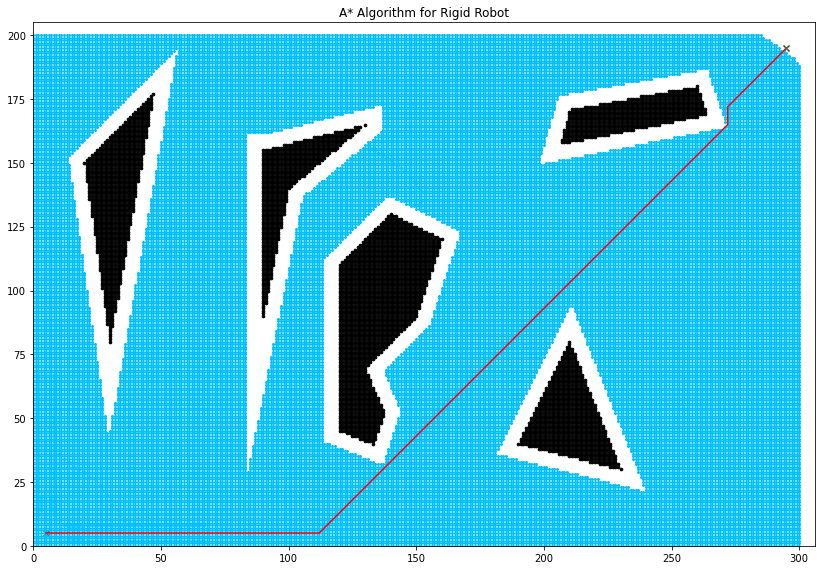

In [12]:
obstacle_x=[]
obstacle_y=[]
for pt in obstacle_points:
    obstacle_x.append(pt[0])
    obstacle_y.append(pt[1])

distance_x=[]
distance_y=[]
for c in backtrack_node:
    distance_x.append(c[0])
    distance_y.append(c[1])
    
fig = plt.figure(figsize=(14,14))

ax = fig.add_subplot(111, aspect='equal', autoscale_on=True,
                     xlim=(0,306), ylim=(0,205))
plt.scatter(obstacle_x,obstacle_y,c='black',s=7)
g=plt.scatter(start[0],start[1],c='darkgreen',marker='x')
sw=plt.scatter(goal[0],goal[1],c='darkgreen',marker='x')
s=plt.plot(distance_x,distance_y,c='red')

visited_x=[]
visited_y=[]
for j in range(len(visited)):
    x_s=visited[j][0]
    y_s=visited[j][1]
    visited_x.append(x_s)
    visited_y.append(y_s)

s=plt.scatter(visited_x,visited_y,c='deepskyblue',s=4,marker='x')

plt.title("A* Algorithm for Rigid Robot")

plt.show()